<a id="0"></a>
<a href="./GaiaTutorial.ipynb" download>GaiaTutorial.ipynb</a>
<a href="./data/gaia3.csv" download>gaia3.csv</a>
<a href="./data/OpenClusters.csv" download>OpenClusters.csv</a>


# Table of contents
1. [Introduction of Gaia](#1)
2. [What is Astroquery](#2)
3. [Querying databases with Astroquery](#3)
4. [Working with Pandas Dataframes](#4)
5. [Calculating the Distance to Stars](#5)
6. [Converting units with Astropy](#6)
7. [Converting from apparent to absolute magnitude](#7)
8. [Exploratory Data Analysis with Pandas](#8)
9. [Understanding Correlations: Unraveling Relationships in Data](#9)
10. [Making Publication Quality Plots](#10)
11. [Understanding Color Maps and Accessibility](#11)
12. [The Hertzsprung-Russell Diagram](#12)
13. [Mapping Stellar Density in Galactic Coordinates](#13)
14. [Open Clusters](#14)
15. [Clustering](#15)


[Top of the page](#0)
<a id="1"></a>
# Accessing and Manipulating Astronomical Data Using Python

In this session, we will learn how to use the Python package [Astroquery](https://astroquery.readthedocs.io/en/latest/) to access astronomical data. We will then utilize [Astropy](https://www.astropy.org/) to simplify various calculations and unit conversions.

Our primary focus will be on data obtained by the [Gaia](https://sci.esa.int/web/gaia) mission. Gaia is a European Space Agency mission with the goal of creating a 3D map of the Milky Way. Gaia's mission is to accurately measure the positions of over 1 billion stars.

![Gaia Image](../Images/Gaia_Exploring_the_multi-dimensional_Milky_Way_pillars.jpg)
*Image: Gaia - Exploring the Multi-dimensional Milky Way*

We will be working with data collected using Gaia's Blue and Red Photometers (BP & RP) and making use of parallax measurements to estimate the distances to celestial objects.


In [5]:
import astroquery

[Top of the page](#0)

# What is Astroquery? <a id="2"></a>

Astroquery is a Python package that streamlines the process of querying astronomical databases and catalogs. It offers a wide range of options for accessing astronomical data. Some of the available options include:

- Querying databases of celestial objects.
- Retrieving data from sky surveys and telescopes.
- Accessing information from observatories and space missions.

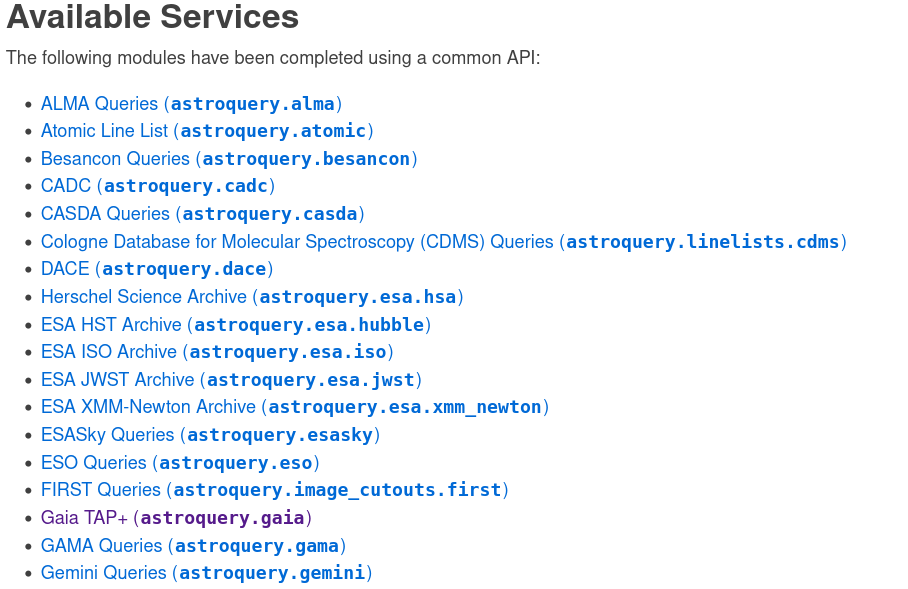
*Image: A selection of options provided by Astroquery*

For our tutorial, we will focus on using Astroquery to work with data from the Gaia mission. To get started, let's import the Gaia module:


In [6]:
from astroquery.gaia import Gaia

In astronomy, there are often vast databases filled with valuable information, and sometimes, we might not know exactly what we're looking for. That's where the ability to explore and discover available database tables becomes essential.


In [7]:
tables = Gaia.load_tables()

INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [8]:
for i, table in enumerate(tables):
    print(i, table.get_qualified_name())

0 external.external.apassdr9
1 external.external.gaiadr2_astrophysical_parameters
2 external.external.gaiadr2_geometric_distance
3 external.external.gaiaedr3_distance
4 external.external.gaiaedr3_gcns_main_1
5 external.external.gaiaedr3_gcns_rejected_1
6 external.external.gaiaedr3_spurious
7 external.external.galex_ais
8 external.external.ravedr5_com
9 external.external.ravedr5_dr5
10 external.external.ravedr5_gra
11 external.external.ravedr5_on
12 external.external.ravedr6
13 external.external.sdssdr13_photoprimary
14 external.external.skymapperdr1_master
15 external.external.skymapperdr2_master
16 external.external.tmass_xsc
17 gaiadr1.gaiadr1.aux_qso_icrf2_match
18 gaiadr1.gaiadr1.ext_phot_zero_point
19 gaiadr1.gaiadr1.allwise_best_neighbour
20 gaiadr1.gaiadr1.allwise_neighbourhood
21 gaiadr1.gaiadr1.gsc23_best_neighbour
22 gaiadr1.gaiadr1.gsc23_neighbourhood
23 gaiadr1.gaiadr1.ppmxl_best_neighbour
24 gaiadr1.gaiadr1.ppmxl_neighbourhood
25 gaiadr1.gaiadr1.sdss_dr9_best_neighbour
26 

We're interested in the "gaiadr3.gaia_source" table, this is entry 88. We can also see what columns are included in this table:

In [9]:
gaia = tables[88]
for col in gaia.columns:
    print(col.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_di

[Top of the page](#0)

<a id="3"></a>
## What Data are we interseted in?
We're interested in extracting specific data fields from the database, which will help us gain insights into celestial objects. Here's what we want to retrieve:

1. **Source Location:**
   - `ra` (Right Ascension)
   - `dec` (Declination)

2. **Color-Magnitude Diagram:**
   - `bp_rp` (Blue-Red Color), which represents the difference between the Blue and Red band magnitudes.

3. **Brightness of the Source:**
   - `phot_g_mean_mag`, which is the average apparent G-band magnitude.

4. **Distance Estimation:**
   - `parallax`, which measures the apparent motion of the star due to the Earth's motion.
   - `parallax_over_error`, calculated as the ratio of parallax to the uncertainty on the parallax.

![Measuring Stellar Distances](../Images/Measuring_stellar_distances_by_parallax_pillars.jpg)
*Image: Measuring Stellar Distances by Parallax*

By combining these fields, we will construct a comprehensive query that will help us obtain the data we need. Additionally, it's a good practice to save the query results to a CSV file for future reference, so we won't need to rerun the query.


In [ ]:
# import pandas as pd
# query_size = 1000000  # Number of stars we want to get
# distance = 200  # Distance (in pc) out to which we will query
# job = Gaia.launch_job_async("select top {}".format(query_size)+
#                 " ra, dec, parallax, parallax_over_error, "   # Getting source location and parallax
#                 " bp_rp, phot_g_mean_mag "                    # Getting color and magnitude measurements
#                 " from gaiadr3.gaia_source"                   # Selecting the data source
#                 # All of these are data quality checks
#                 " where parallax_over_error > 10"
#                 " and visibility_periods_used > 8"
#                 " and phot_g_mean_flux_over_error > 50"
#                 " and phot_bp_mean_flux_over_error > 20"
#                 " and phot_rp_mean_flux_over_error > 20"
#                 " and phot_bp_rp_excess_factor <"
#                 " 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
#                 " and phot_bp_rp_excess_factor >"
#                 " 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
#                 " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<"
#                 "1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))"
#                 # Filtering on distance
#                 +" and 1000/parallax <= {}".format(distance))


# r = job.get_results()
# # Convert to pandas
# df = r.to_pandas()
# # Save to a csv
# df.to_csv("gaia3.csv")

[Top of the page](#0)

 <a id="4"></a>
# What is pandas

[Pandas](https://pandas.pydata.org/) is a popular open-source data manipulation and analysis library for Python, providing versatile data structures and data analysis tools. A pandas `dataframe` is a two-dimensional, labeled data structure that resembles a table and is used for data manipulation, analysis, and exploration in Python.

In [11]:
import pandas as pd
# Read in a csv file with pandas
df = pd.read_csv("gaia3.csv")


In [12]:
# use head() to see the first few entries
df.head()

Unnamed: 0          ra        dec   parallax  parallax_over_error  \
0           0  251.492554 -50.749533   6.383756           103.153015   
1           1  251.589977 -50.638635  13.398257           750.623540   
2           2  251.093139 -51.007072   6.106724           448.880800   
3           3  251.746461 -51.201058   7.481942            87.461440   
4           4  250.188154 -51.273050   8.606533           163.012250   

      bp_rp  phot_g_mean_mag          pm       pmra  pmra_error       pmdec  \
0  0.795505        10.546730   32.093870  31.380714    0.059630   -6.728077   
1  2.165551        13.470652   98.008840 -49.358441    0.017024  -84.672770   
2  1.269135        12.529914    9.986012   5.650984    0.013578    8.233275   
3  2.588948        16.969418  147.466350  10.335827    0.085701 -147.103700   
4  2.755577        16.339110    5.618203  -1.305274    0.064197    5.464473   

   pmdec_error  
0     0.045104  
1     0.012676  
2     0.009894  
3     0.056509  
4     0.043635

In [13]:
# use describe to see some useful stats
df.describe()

Unnamed: 0            ra           dec      parallax  \
count  1.433622e+06  1.433622e+06  1.433622e+06  1.433622e+06   
mean   7.168105e+05  1.826020e+02 -5.932620e-01  7.951749e+00   
std    4.138512e+05  1.039087e+02  3.972358e+01  4.958763e+00   
min    0.000000e+00  1.786275e-04 -8.991512e+01  5.000001e+00   
25%    3.584052e+05  9.176268e+01 -3.176953e+01  5.610729e+00   
50%    7.168105e+05  1.847296e+02 -6.636379e-01  6.571446e+00   
75%    1.075216e+06  2.738694e+02  3.016465e+01  8.494259e+00   
max    1.433621e+06  3.599994e+02  8.994934e+01  7.680665e+02   

       parallax_over_error         bp_rp  phot_g_mean_mag            pm  \
count         1.433622e+06  1.433622e+06     1.433622e+06  1.433622e+06   
mean          2.770547e+02  2.157298e+00     1.482734e+01  6.438331e+01   
std           2.882675e+02  8.357065e-01     2.650869e+00  6.995515e+01   
min           1.001268e+01 -6.166201e-01     2.777715e+00  1.365079e-02   
25%           9.643445e+01  1.533804e+00     1.329365e+01  2.768513e+01   
50%           1.894774e+02  2.433110e+00     1.555917e+01  4.784237e+01   
75%           3.672869e+02  2.789234e+00     1.682265e+01  7.966884e+01   
max           1.540048e+04  5.435446e+00     2.058442e+01  1.039335e+04   

               pmra    pmra_error         pmdec   pmdec_error  
count  1.433622e+06  1.433622e+06  1.433622e+06  1.433622e+06  
mean  -1.552588e+00  5.269976e-02 -2.148792e+01  4.799410e-02  
std    6.803307e+01  4.709206e-02  6.281956e+01  4.192370e-02  
min   -4.406469e+03  4.317274e-03 -5.817800e+03  5.807723e-03  
25%   -2.899033e+01  2.056515e-02 -4.296366e+01  1.857064e-02  
50%   -1.827989e+00  3.864415e-02 -1.609957e+01  3.580896e-02  
75%    2.575548e+01  7.004569e-02  6.412341e+00  6.389684e-02  
max    6.765995e+03  2.072775e+00  1.036239e+04  2.114847e+00

[Top of the page](#0)

 <a id="5"></a>

# How Do We Calculate the Distance to Stars?

Determining the distance to stars in astronomy involves trigonometry. We can calculate the distance ($d$) to a star using the formula:

$$d = \frac{1}{p},$$

Here, $d$ is the distance in a unit called "parsecs," and "$p$" is the parallax angle in arcseconds. It's important to note that the Gaia data records the parallax angle in units of milliarcseconds, so we need to perform a unit conversion.
[Top of the page](#0)

 <a id="6"></a>
# How Do We Convert Units?

To handle this unit conversion, we'll utilize `astropy.units`. To further simplify the process, we'll leverage Astropy not only for unit conversion but also for distance calculation. In addition, we'll use NumPy arrays to perform mathematical operations on large lists or arrays of numbers.


In [14]:
import numpy as np
from astropy import units as u
from astropy.coordinates import Distance

In [22]:
def get_distance(parallax):
    # Convert parallax angle to milliarcseconds (mas)
    p = parallax * u.mas
    
    # Calculate the distance using astropy's Distance module
    distance = Distance(parallax=p)
    
    return distance


In [23]:
# Calculate the distances to the stars
star_distances = get_distance( np.array(df["parallax"]) )


In [24]:
# Get the minimum and maximum of the distances
min_distance = star_distances.min()
max_distance = star_distances.max()
print (min_distance, max_distance)

1.3019705311704333 pc 199.9999448214332 pc


So, let's recap our progress:

- We utilized Astroquery to retrieve data from the Gaia mission, obtaining essential information about stars.
- With the help of Astropy, we handled the conversion of parallax angles from milliarcseconds to arcseconds and subsequently calculated the distances to these stars in parsecs.

The outputted distances are indicated with `pc` after the numeric value, signifying the unit of measurement. Astropy makes it easy to work with these units and perform conversions as needed.


In [28]:
# Convert the distances to light years, meters and inches
print (f'Distance in light years {min_distance.to("lightyear"):0.2f}')
print (f'Distance in meters {min_distance.to("mm"):0.2e}')
# If we want to use imperial units we must enable it
# (because we should always use metric!)
u.imperial.enable()  
print (f'Distance in inches {min_distance.to("inch"):0.2e}')

Distance in light years 4.25 lyr
Distance in meters 4.02e+19 mm
Distance in inches 1.58e+18 inch


Converting between units with Astropy is as simple as using `.to("unit")`. This not only saves time but also minimizes the risk of human errors when performing unit conversions.

[Top of the page](#0)

 <a id="7"></a>

# Converting from Apparent Magnitude to Absolute Magnitude

When assessing the brightness of an astronomical object, it's crucial to consider the impact of distance on our measurements.

The brightness of an object appears different depending on its proximity to us; it will appear brighter if it's closer and dimmer if it's farther away. In astronomy, we commonly use "Apparent Magnitude" to describe how bright an object appears from our vantage point and "Absolute Magnitude" to standardize brightness by accounting for the object's distance. Absolute Magnitude quantifies how bright an object would appear if it were located precisely 10 parsecs away.

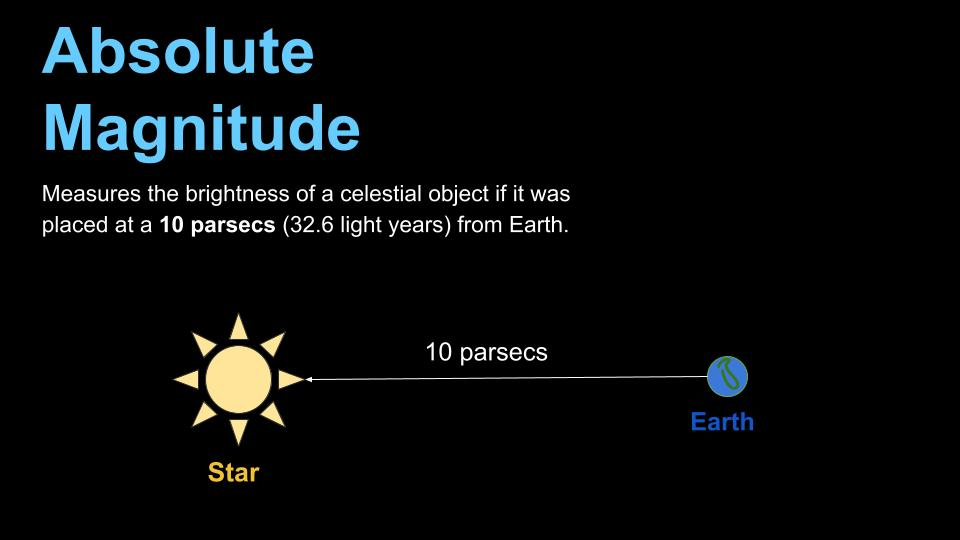
*Image: Absolute Magnitude Concept*

By knowing the distance in parsecs, we can convert from apparent to absolute magnitude using the formula:

$$M = m - 5 \log_{10}(d_{pc}) + 5,$$

Where:
- $M$ is the Absolute Magnitude.
- $m$ is the Apparent Magnitude.
- $d_{pc}$ is the distance in parsecs.

This formula enables us to correct for the influence of distance when comparing the brightness of celestial objects.


In [29]:
# Calculate the absolute magnitude of the star
def calculate_absolute_magnitude(apparent_magnitude, distance):
    M = apparent_magnitude - 5 * np.log10(distance) + 5
    return M

In [32]:
AbsM = calculate_absolute_magnitude(np.array(df["phot_g_mean_mag"]), star_distances)

UnitTypeError: Can only apply 'log10' function to dimensionless quantities

Let's add the values we've determinded back into out data frame

In [ ]:
# Add the values to our dataset
df["AbsM"] = AbsM
df["Distance"] = star_distances.value

In [ ]:
df.head()

[Top of the page](#0)

 <a id="8"></a>
# Exploratory Data Analysis with Pandas

Explore your dataset through the lens of Exploratory Data Analysis (EDA). EDA is all about unveiling hidden patterns and stories within your data. It's your detective work to discover insights, detect anomalies, and gain a deeper understanding of your dataset.

We'll utilize pandas for data manipulation and Matplotlib/Seaborn for visualization. In this section, we'll delve into techniques for exploring your dataset, from basic properties to captivating visualizations. Welcome to the world of EDA!

Some methods of EDA:
1. **Descriptive Statistics:**
   - Summary statistics
   - Count of missing values

2. **Data Distribution:**
   - Histograms
   - Box plots
   - Probability density functions (PDFs)
   - Skewness and kurtosis

3. **Data Relationships:**
   - Correlation matrix
   - Scatter plots
   - Heatmaps
   - Pair plots

4. **Categorical Data:**
   - Frequency counts
   - Bar plots
   - Cross-tabulations

5. **Data Quality:**
   - Outliers
   - Missing data
   - Data consistency

6. **Dimensionality Reduction:**
   - Principal Component Analysis (PCA)
   - t-Distributed Stochastic Neighbor Embedding (t-SNE)

7. **Data Visualization:**
   - Various plots and charts



In [34]:
import matplotlib.pyplot as plt
df.head()

Unnamed: 0          ra        dec   parallax  parallax_over_error  \
0           0  251.492554 -50.749533   6.383756           103.153015   
1           1  251.589977 -50.638635  13.398257           750.623540   
2           2  251.093139 -51.007072   6.106724           448.880800   
3           3  251.746461 -51.201058   7.481942            87.461440   
4           4  250.188154 -51.273050   8.606533           163.012250   

      bp_rp  phot_g_mean_mag          pm       pmra  pmra_error       pmdec  \
0  0.795505        10.546730   32.093870  31.380714    0.059630   -6.728077   
1  2.165551        13.470652   98.008840 -49.358441    0.017024  -84.672770   
2  1.269135        12.529914    9.986012   5.650984    0.013578    8.233275   
3  2.588948        16.969418  147.466350  10.335827    0.085701 -147.103700   
4  2.755577        16.339110    5.618203  -1.305274    0.064197    5.464473   

   pmdec_error  
0     0.045104  
1     0.012676  
2     0.009894  
3     0.056509  
4     0.043635

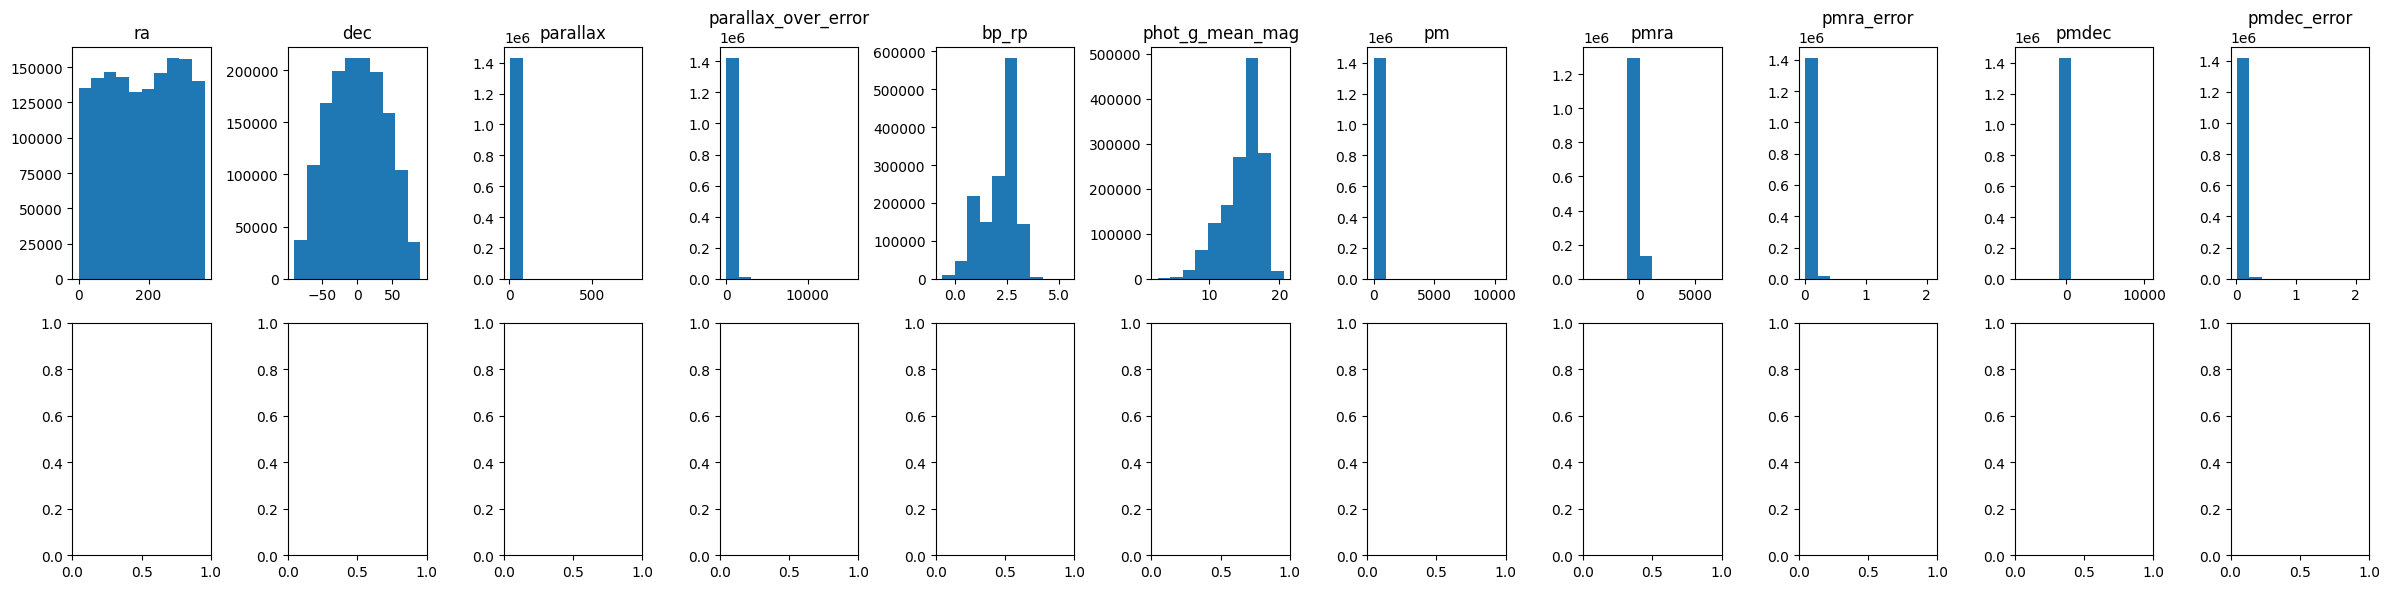

In [36]:

# Get the columns to plot (excluding the first column, possibly an index or label)
cols = df.columns[1:]

# Calculate the number of rows and columns for subplots
nrows = 2
ncols =  len(cols)+1 // nrows

# Create a figure with subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(24, 6))

# Flatten the axs array to loop through the subplots
for i, ax in enumerate(axs.ravel()):
    # Check if there are more columns to plot
    if i < len(cols):
        ax.hist(df[cols[i]])
        ax.set_title(cols[i])

# Adjust subplot layout for better spacing
plt.tight_layout()
plt.show()

seaborn also has a lof of useful plotting capbabilities

In [39]:
import seaborn as sns

In [40]:
# Create a figure with subplots using Seaborn
fig, axs = plt.subplots(nrows, ncols, figsize=(24, 6))

# number of points to plot
npoints = 100000

# Flatten the axs array to loop through the subplots
for i, ax in enumerate(axs.ravel()):
    # Check if there are more columns to plot
    if i < len(cols):
        sns.histplot(data = df[:npoints], x=cols[i], ax=ax, kde=True)

# Adjust subplot layout for better spacing
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

[Top of the page](#0)

 <a id="9"></a>
# Understanding Correlations: Unraveling Relationships in Data

In the realm of data analysis, uncovering the relationships and dependencies between different variables is a fundamental task. Correlations are the keys that unlock the doors to understanding the hidden patterns, associations, and causations within datasets. These intriguing statistical relationships offer a wealth of insights, guiding our understanding of how changes in one variable can impact another.

Correlations enable us to answer questions such as:

- Does an increase in one variable lead to a corresponding increase or decrease in another?
- Are two variables completely independent, or is there a subtle connection waiting to be discovered?
- Which factors are most influential in affecting a specific outcome?

With the correlation between two parameters (A and B) we can say:
- 1, when  A increases so does B. These are said to be "correalated"
- 0, when A increases we see no change in B. These are said to be "uncorrelated"
- -1, when A increase B decreases. These are said to be "anit-correalted"

In the case of 1 and -1, we have 100% correlation and anti-correlation. We can have any value between these two numbers


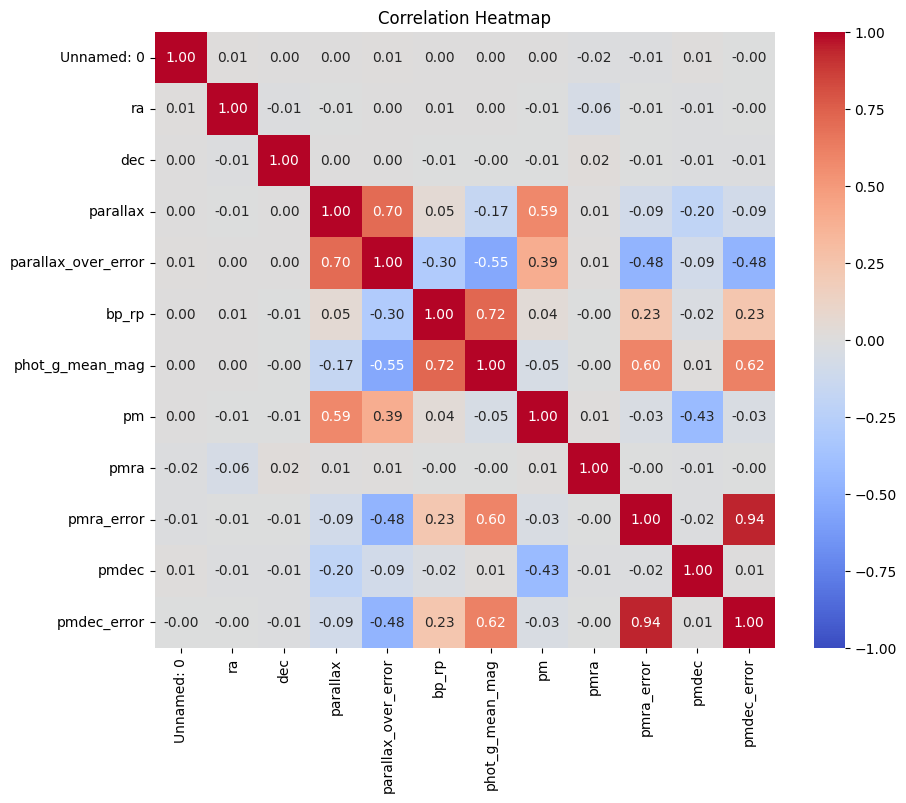

In [43]:

# Calculate the correlation matrix
cormat = df.corr()

# Set the colormap and color range
cmap = sns.color_palette("coolwarm", as_cmap=True)  # You can change the colormap as needed
vmin, vmax = -1, 1  # Set the range for the color scale

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size

sns.heatmap(cormat, cmap=cmap, vmin=vmin, vmax=vmax, annot=True, fmt=".2f")  # Create the heatmap
# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


With just a few lines of code, we can quickly discern significant insights from a correlation plot. We observe a clear correlation between the distance (`Distance`) and the brightness, as indicated by the `phot_g_mean_mag` value. However, this correlation disappears when we convert the brightness to Absolute Magnitude (`AbsM`).



[Top of the page](#0)

<a id="10"></a>
# Making Publication Quality Plots

Now, let's proceed with building the color-magnitude diagram by plotting `bp_rp` against `AbsM`.


Creating a high-quality scientific plot is essential for effectively conveying your data. A well-crafted plot should be designed to clearly communicate the key information to the viewer. It should include the following elements to enhance data understanding:

- **Labelled Axes:** Clearly annotated x and y axes provide context and meaning to the data.

- **Descriptive Title:** A meaningful title summarizing the plot's content is crucial for quick comprehension.

- **Grid Lines:** Grid lines assist in reading data values accurately and help viewers align data points.

- **Sensible Scaling:** Appropriate axis scaling ensures that data is presented in a visually understandable manner without distortion.

- **Legend (if applicable):** If multiple data series are displayed, a legend should explain their meaning.

- **Colorbar (if applicable):** When using color to represent data values, a colorbar helps viewers interpret the color-coding.

By incorporating these elements, your scientific plot becomes a powerful tool for sharing insights and findings with your audience.



KeyError: 'AbsM'

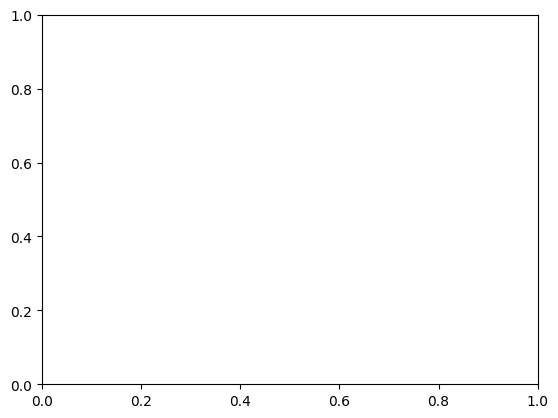

In [45]:
# Create a scatter plot of bp_rp vs AbsM
ax = plt.subplot()
ax.scatter(df["bp_rp"], df["AbsM"], alpha=0.05, s=1, color='k')

ax.hist2d(df["bp_rp"], df["AbsM"], bins=100, cmin=10, cmap="jet")
# Invert the y axis, smaller magnitude -> Brighter star
ax.invert_yaxis()



While the scatter plot does reveal some underlying structure, it may not provide a highly informative representation of the data. The plot becomes saturated in high-density regions, making it challenging to discern details. To address this, we can use a histogram to visualize the density distribution more effectively.


In [ ]:
ax = plt.subplot()

# Create a 2D histogram
# bins = 100, require 100 bins in the x and y directions
# cmin = 10, require at least 10 entries in a bin to be shown
# cmap = "jet", use the "jet" color map

ax.invert_yaxis()

This looks better, but we've made a critical error...
[Top of the page](#0)

<a id="11"></a>

# Understanding Color Maps and Accessibility

Color maps play a crucial role in data visualization, helping us represent data through a spectrum of colors. However, not all color maps are created equal, and some, like the "jet" color map, have raised concerns due to their perceptual issues. 

The "jet" color map, characterized by its vibrant and rainbow-like appearance, is notorious for its drawbacks, including:

- **Perceptual Uniformity**: It fails to maintain a perceptual uniformity, which means that equal steps in data values may not appear equally spaced in the color map, leading to misleading visualizations.

- **Color Saturation**: The "jet" color map can saturate at high and low ends, making it challenging to distinguish different data values in these regions.

- **Colorblind Accessibility**: Accessibility is a vital concern. Many individuals with color vision deficiencies, commonly referred to as colorblindness, may find it difficult to interpret data represented using color maps like "jet."

To create effective and accessible visualizations, it's essential to consider the choice of color map and its impact on how data is perceived, especially in cases where colorblind individuals may interact with the visualizations.



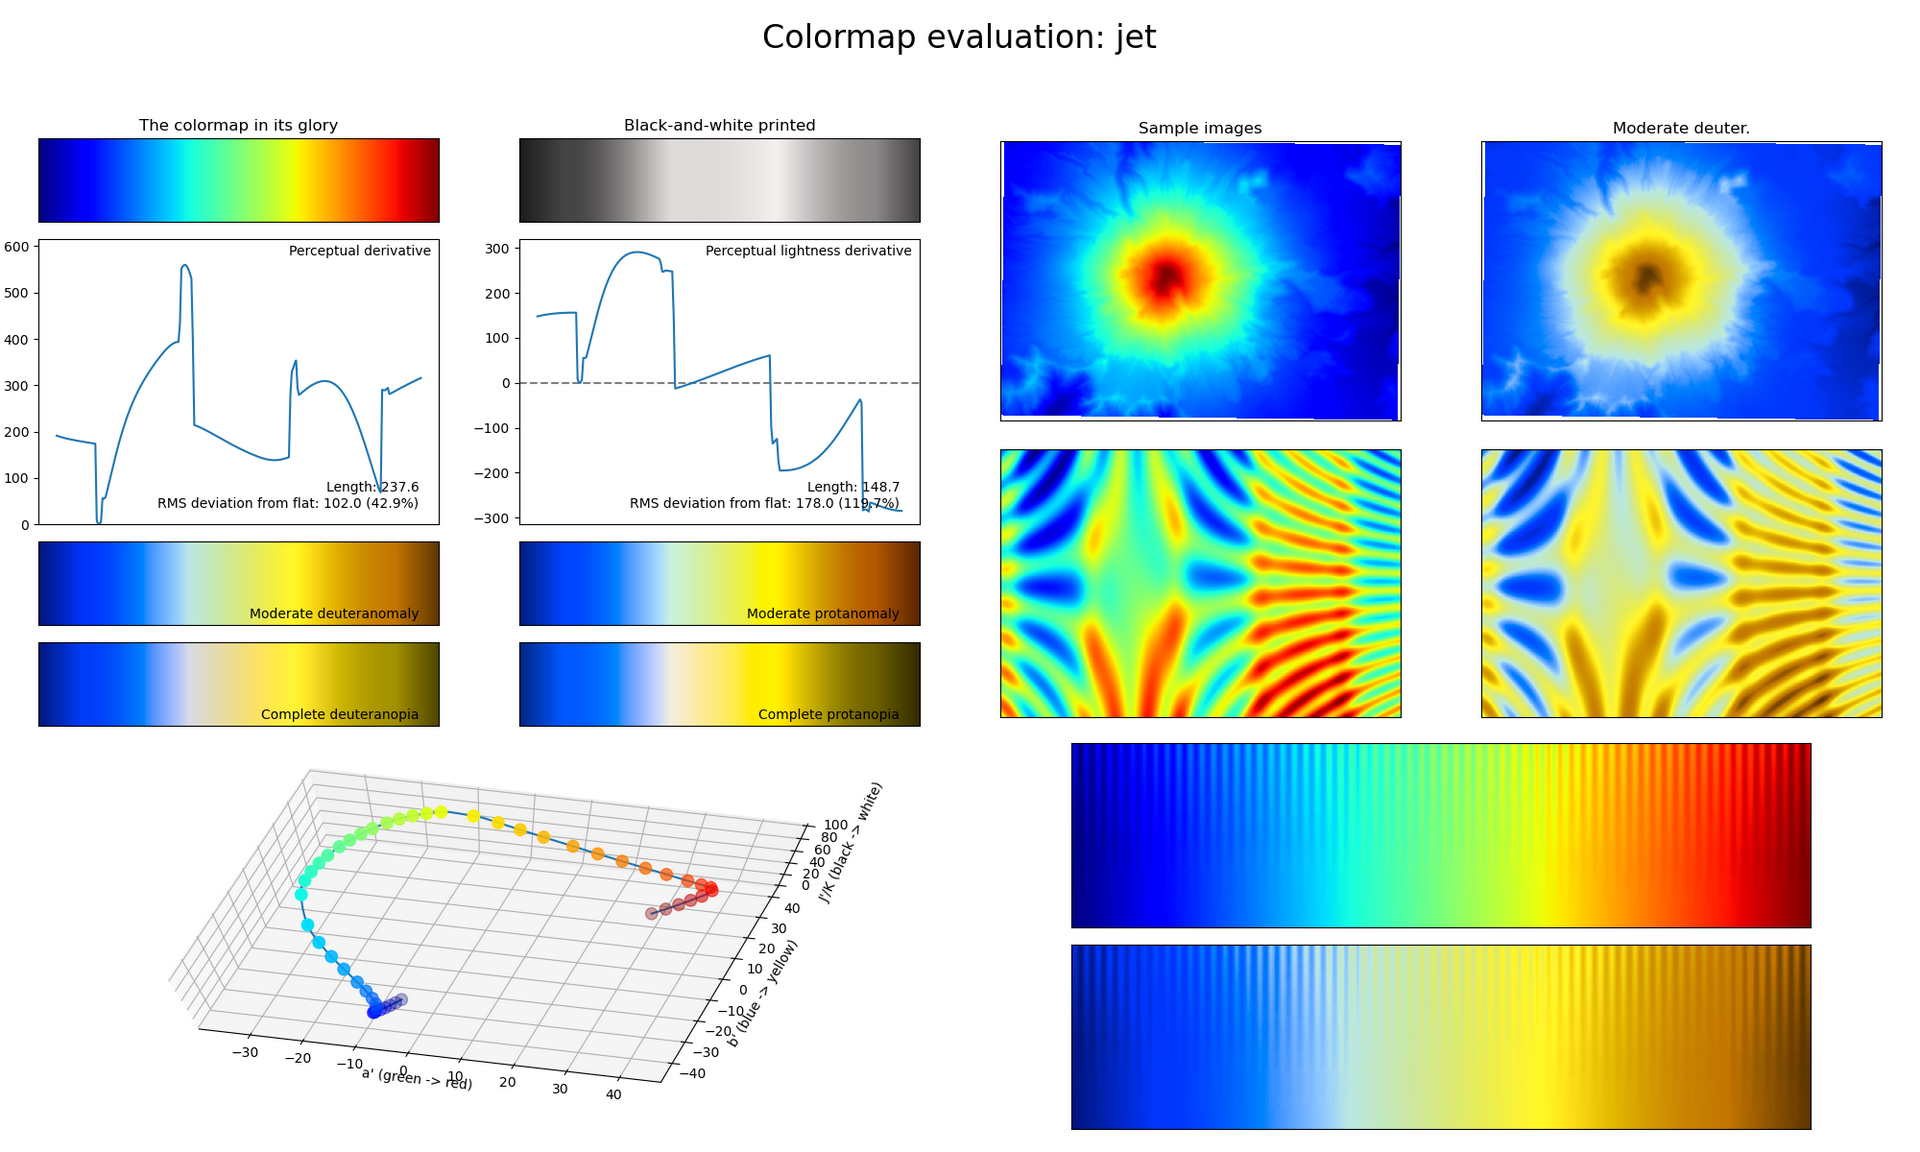

What information do you get from the above plot?

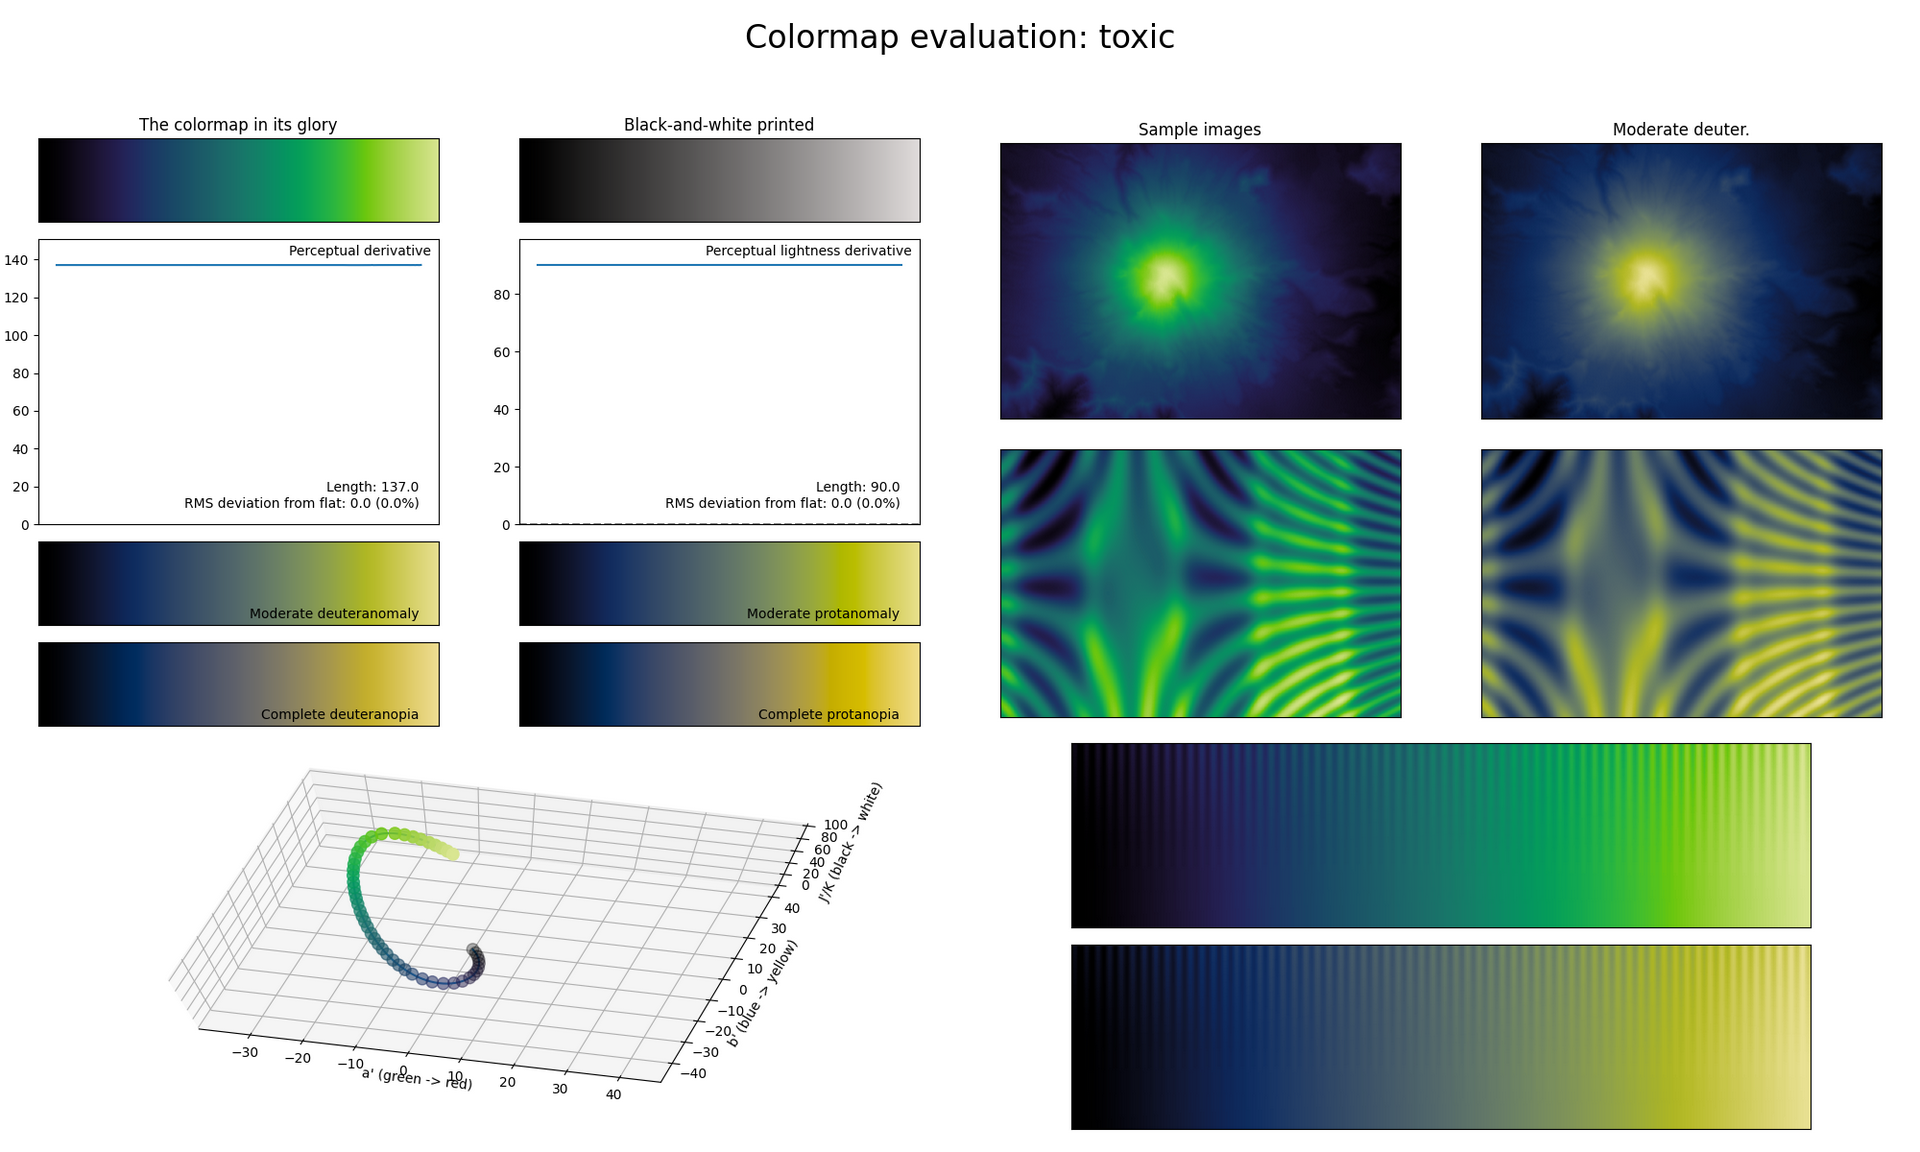

[CMasher](https://cmasher.readthedocs.io/index.html)is a valuable Python package offering accessible scientific colormaps. All the color maps included in CMasher are designed to be colorblind-friendly and exhibit a linear increase in brightness."

In [ ]:
 import cmasher as cms

In [ ]:
ax = plt.subplot()

# Create a 2D histogram
# bins = 100, require 100 bins in the x and y directions
# cmin = 10, require at least 10 entries in a bin to be shown
# cmap = "jet", use the "jet" color map


ax.invert_yaxis()

This looks better, but we still need to clean things up. The plot looks good, but a reader has no idea what is been plotted.


In [ ]:
# use colors to get a log color scale
from matplotlib import colors


# Create a subplot
ax = plt.subplot()

# Scatter plot of data points with customizations
ax.scatter(df["bp_rp"], df["AbsM"], alpha=0.05, s=1, color='k', zorder=0)

# Create a 2D histogram (density plot) with a log-normal color scale
# - bins: Use 100 bins in both the x and y directions
# - cmin: Require at least 10 entries in a bin to be shown
# - cmap: Use the "toxic" color map from the cms module
# - norm: Utilize a logarithmic color scale to better visualize data distribution
h = ax.hist2d(df["bp_rp"], df["AbsM"], bins=100, cmin=50, norm=colors.LogNorm(), zorder=0.5, cmap=cms.toxic)


# Invert the y-axis to match the typical appearance of a color-magnitude diagram
ax.invert_yaxis()

# Add a color bar for the density plot
cb = fig.colorbar(h[3], ax=ax, pad=0.02)

# Set labels for the x and y axes
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')

# Set a label for the color bar
cb.set_label(r"$\mathrm{Stellar~density}$")

# Add grid lines to the plot
ax.grid()

So, what insights can we gather from this plot?

- The plot's left side corresponds to 'blue,' while the right side corresponds to 'red.'
- The lower section of the plot represents 'dim' stars, whereas the upper section showcases 'bright' stars.
- The majority of stars form a discernible diagonal pattern, with dimmer stars appearing 'redder' and brighter stars appearing 'bluer.'
- Notably, we observe a distinct grouping of dim, blue stars in the bottom-left quadrant of the plot.
- There is a noticeable 'turn-off' branch where we encounter both bright blue and bright red stars.
- As we progress along this branch, the bright red stars appear to level off in brightness and become more 'red.'
- Stars residing in the bright red and dim blue regions are relatively scarce.




[Top of the page](#0)

<a id="12"></a>

# The Hertzsprung-Russell Diagram


In the realm of astronomy, we've uncovered one of the most profound tools: the Hertzsprung-Russell (HR) Diagram.

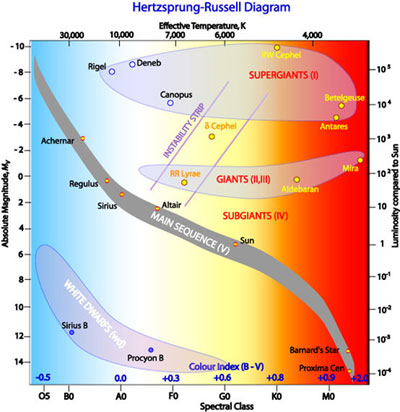

The HR Diagram serves as a stellar narrative, shedding light on the intricate lives of stars. It all commences with a star's birth, and its initial position on the diagram is determined by its mass. Stars embark on their cosmic journey along the 'Main Sequence,' where they sustain themselves by converting hydrogen into helium—a process known as hydrogen burning. This phase constitutes the majority of a star's existence.

However, as time advances, stars deplete their hydrogen fuel. When this occurs, they transition to the 'Giant' branch. Giants display a cooler surface temperature, giving them a 'reddish' appearance. Concurrently, they experience a considerable increase in luminosity, shining much brighter. This phenomenon is accompanied by a significant expansion in their physical size, leading to their classification as 'red giants.'

Now, here's the fascinating twist: Stars like our Sun, after the exhaustion of helium, evolve into 'White Dwarfs.' This transformation arises from the fact that they lack the necessary mass to facilitate the fusion of elements heavier than helium. These stars have meticulously fused all their available helium into carbon. Unlike most stars that maintain a delicate equilibrium between gravitational forces and nuclear fusion, White Dwarfs are held in place by a phenomenon known as 'electron degeneracy.'

In essence, the HR Diagram serves as a window into the diverse chapters of stellar existence, offering us valuable insights into the captivating stories of these cosmic marvels.


[Top of the page](#0)

<a id="13"></a>

# Mapping Stellar Density in Galactic Coordinates

Our celestial journey continues as we leverage the rich data from the Gaia mission that we previously dissected. In this leg of our astronomical exploration, we're about to embark on an exciting mission: mapping the stellar density within our Milky Way galaxy.

Armed with Gaia's invaluable data, we'll now venture into the realm of galactic coordinates. These coordinates provide us with a unique perspective, allowing us to chart the positions and densities of stars across the vast expanse of our galactic home.

By harnessing the power of data analysis and visualization, we'll unveil a stellar density map that offers an intricate view of the distribution and concentration of stars within the Milky Way. Our map will not only guide us through the celestial neighborhoods but also shed light on the interplay between stars, clusters, and the galactic structures that shape our night sky.

So, prepare to join us in this thrilling endeavor as we decode the secrets of the stars and craft a stellar density map in the wondrous realm of galactic coordinates.


In [ ]:
from astropy.coordinates import SkyCoord

In [ ]:
# Use SkyCoord to convert coordinates
coord = SkyCoord(, unit="deg")


In [ ]:
# Convert to galactic coordiates
gal_coords = coord.galactic

In [ ]:
plt.subplot(111, projection='aitoff')
plt.grid(True)
# Create a scatter plot of all the stars
plt.scatter(, alpha = 0.002)


In [ ]:
def get_bin_centers(binning):
    """
    Calculate the bin centers given a set of bin edges.

    Parameters:
    binning (numpy.ndarray): An array containing the bin edges.

    Returns:
    numpy.ndarray: An array of bin centers.

    Example:
    >>> bin_edges = np.array([0, 1, 2, 3, 4, 5])
    >>> centers = get_bin_centers(bin_edges)
    >>> print(centers)
    [0.5 1.5 2.5 3.5 4.5]
    """

    # Calculate the width of each bin by subtracting the previous bin's edge from the current bin's edge
    width = binning[1:] - binning[:-1]

    # Calculate the bin centers by adding half of the bin width to the left bin edge
    bin_centers = binning[:-1] + 0.5 * width

    return bin_centers


In [ ]:
# Define the number of bins and the bin edges for galactic longitude (l) and latitude (b)
nbins = 100
l_bins = np.linspace(-180, 180, nbins)
b_bins = np.linspace(-90, 90, nbins)

# Calculate the bin centers for galactic longitude (l) and latitude (b)
l_center = get_bin_centers(l_bins)
b_center = get_bin_centers(b_bins)

# Calculate the 2D histogram (counts) of galactic coordinates l and b
# Use np.histogram2d to create a 2D histogram from galactic coordinates
# Wrap galactic longitude (l) at 180 degrees to ensure it covers the full range
counts, _, _ = np.histogram2d(
    gal_coords.l.wrap_at('180d').radian,  # Convert and wrap l in radians
    gal_coords.b.radian,                # Convert b in radians
    bins=[np.deg2rad(l_bins), np.deg2rad(b_bins)]  # Convert bin edges to radians
)


In [ ]:
# Create a subplot with an Aitoff projection for a celestial map
ax = plt.subplot(111, projection='aitoff')

# Create a pseudo-color mesh plot (pcolormesh) for the stellar density map
# Use np.deg2rad to convert bin centers from degrees to radians for the x and y axes
# Use 'counts.T' to transpose the counts array for proper orientation
# Apply a PowerNorm to enhance visualization (power=0.7)
# Set zorder to control the layering of the plot
# Use the 'savanna' color map from cms module
h = ax.pcolormesh(np.deg2rad(l_center), np.deg2rad(b_center), counts.T, norm=colors.PowerNorm(0.7), zorder=0.5, cmap=cms.savanna)

# Add a color bar for the density map
cb = fig.colorbar(h, ax=ax, pad=0.02)

# Set labels for the x and y axes
ax.set_xlabel(r'Galactic Longitude')
ax.set_ylabel(r'Galactic Latitude')

# Set a label for the color bar
cb.set_label(r"$\mathrm{Stellar~density}$")

# Add grid lines to the celestial map
ax.grid()


We observer that most stars fall alone a latitude of 0. This is the galactic plane. We also notice some spots of high stellar density. These are likely stellar clusters. Clusters of gravationally bound groups of stars.


[Top of the page](#0)

<a id="14"></a>

# Open Clusters



![Description of the Image](https://cdn.spacetelescope.org/archives/images/thumb700x/potw2134a.jpg)

Open cluster: NGC 2164

Open clusters are remarkable gatherings of young stars that form from the same cloud of interstellar gas and dust. These stellar congregations are a captivating feature of our galaxy, the Milky Way, and can be found in various regions of its spiral arms. Open clusters typically contain hundreds to thousands of stars.

Open clusters provide insights into stellar evolution and the early stages of star formation. The young stars within open clusters often share similar ages, compositions, and distances, making them ideal laboratories for studying stellar properties and the effects of their environment on their development.

Over time, open clusters gradually disperse due to gravitational interactions and tidal forces from the Milky Way. As a result, the stars within these clusters eventually go their separate ways, becoming part of the general stellar population of our galaxy.

Studying open clusters offers valuable clues about the dynamics of our galaxy, the formation of stars, and the life cycles of stellar systems. Astronomers continue to explore and catalog these captivating celestial gatherings to deepen our understanding of the cosmos.

In [ ]:
# Load in open cluster data
df_open_clusters = 

In [ ]:
df_open_clusters.head()

In [ ]:
# Filter the clusters within 200 pc
df_open_clusters_near = 

In [ ]:
df_open_clusters_near.head()

In [ ]:
# Convert to Galactic Coordintes
cluster_ra = df_open_clusters_near["Unnamed: 1_level_0"]
cluster_dec = df_open_clusters_near["Unnamed: 2_level_0"]
cluster_coords = 

df_open_clusters_near["l"] = 
df_open_clusters_near["b"] = 

In [ ]:
df_open_clusters_near.head()

In [ ]:
sns.set_palette("colorblind")

# Create a subplot with an Aitoff projection for a celestial map
ax = plt.subplot(111, projection='aitoff')

# Create a pseudo-color mesh plot (pcolormesh) for the stellar density map
# Use np.deg2rad to convert bin centers from degrees to radians for the x and y axes
# Use 'counts.T' to transpose the counts array for proper orientation
# Apply a PowerNorm to enhance visualization (power=0.7)
# Set zorder to control the layering of the plot
# Use the 'savanna' color map from cms module
h = ax.pcolormesh(np.deg2rad(l_center), np.deg2rad(b_center), counts.T, norm=colors.PowerNorm(0.7), zorder=0.5, cmap=cms.sepia)

# Add a color bar for the density map
cb = fig.colorbar(h, ax=ax, pad=0.02)

# Set labels for the x and y axes
ax.set_xlabel(r'Galactic Longitude')
ax.set_ylabel(r'Galactic Latitude')

# Set a label for the color bar
cb.set_label(r"$\mathrm{Stellar~density}$")


# Set the number of brightest objects to overlay
N = 3 # Adjust this to select the top N brightest objects

# Sort the DataFrame by apparent magnitude (brightness)
sorted_data = 

# Select the top N brightest objects
brightest_objects = 

# Create a scatter plot of galactic coordinates (l, b)
circle_size = 140
for i in range(len(brightest_objects)):
    ax.scatter(
        brightest_objects['l'].iloc[i], 
        brightest_objects['b'].iloc[i], 
        facecolor='none', edgecolor=f'C{i}',
        s=circle_size,
        label=brightest_objects['Cluster identifier'].iloc[i])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjust the bbox_to_anchor to control the legend position
# Add grid lines to the celestial map
ax.grid()


[Top of the page](#0)

<a id="15"></a>

# Clustering

It's noteworthy that three of the brightest nearby open clusters align with three of the most prominent hotspots on our stellar density map. This alignment isn't surprising, as a density map naturally highlights concentrations of stars, including known star clusters.

Now, let's embark on the journey of exploring additional potential star clusters within our dataset. We'll employ a clustering algorithm known as DBSCAN. DBSCAN is a versatile algorithm capable of identifying clusters within data without prior knowledge of the number of clusters. Furthermore, it's designed to handle noise, such as random stars, ensuring that our focus remains on identifying genuine clusters without being perturbed by nearby stars.


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
x = gal_coords.l.wrap_at('180d').radian
y = gal_coords.b.radian
z = np.log10(df["Distance"])
data = np.array([x,y,z]).T

normalized_data = (data - data.mean(axis=0)) / data.std(axis=0)
